In [2]:
import pandas as pd
import random
import numpy as np
# Load the CSV file into a DataFrame
import os
# Change to a specific folder within Colab

from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/drive/My Drive/parkinson.csv'
df = pd.read_csv(file_path)


Mounted at /content/drive


In [ ]:
print(df.shape)

(195, 24)


In [7]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()



# Select only numerical features for scaling
numerical_features = df.select_dtypes(include=np.number).columns
numerical_features
numerical_features=numerical_features.drop('status')
print(numerical_features.shape)
# Fit the scaler to the numerical features and transform the data
df_standardized = pd.DataFrame(scaler.fit_transform(df[numerical_features]), columns=numerical_features)

# Concatenate the standardized numerical features with the non-numerical features
df_standardized = pd.concat([df['name'], df_standardized], axis=1)
df_standardized

(22,)


,name,avg_fre,max_fre,min_fre,var_fre1,var_fre2,var_fre3,var_fre4,var_fre5,var_amp1,...,var_amp5,var_amp6,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,-0.829300,-0.436165,-0.952037,0.334914,0.749759,0.132963,0.760800,0.131755,0.745985,...,0.332985,0.607532,-0.067893,-0.193225,-0.807838,1.760814,0.801323,0.480477,-0.210531,0.868886
1,phon_R01_S01_2,-0.770972,-0.530974,-0.057721,0.715418,1.037674,0.453892,1.276809,0.452684,1.681731,...,1.159454,1.548254,-0.137843,-0.634508,-0.387524,1.837562,1.479853,1.311185,0.275077,1.803605
2,phon_R01_S01_3,-0.909476,-0.723168,-0.109875,0.884991,1.325589,0.720770,1.585687,0.721813,1.202693,...,0.699187,1.175323,-0.291633,-0.279760,-0.662075,1.942048,1.141445,1.017682,-0.103629,1.402661
3,phon_R01_S01_4,-0.909622,-0.649092,-0.114229,0.775389,1.325589,0.578885,1.284076,0.577677,1.340396,...,0.806859,1.340229,-0.280719,-0.281346,-0.613134,1.832380,1.440945,1.293840,0.062145,1.806954
4,phon_R01_S01_5,-0.925657,-0.606245,-0.130608,1.368893,1.901418,1.095750,2.047187,1.096793,1.836448,...,1.216839,1.899461,-0.178026,-0.506745,-0.783021,1.909364,1.780940,0.096195,-0.130026,2.267082
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,phon_R01_S50_2,0.483467,0.371185,-0.508265,-0.337173,-0.401899,-0.228505,-0.311189,-0.227459,0.593395,...,0.199282,0.759930,0.069278,-0.536647,-0.483208,-1.090704,-0.785527,-1.256837,0.721944,-0.817703
191,phon_R01_S50_3,1.339202,0.612690,-0.618218,-0.120037,-0.401899,0.001213,-0.191272,0.002258,-0.116922,...,-0.313046,0.037108,-0.167360,-0.620463,-0.644916,-0.631503,-0.469859,-1.168475,1.054135,-0.418929
192,phon_R01_S50_4,0.495578,0.470104,-0.968393,1.526058,1.037674,0.991026,0.797139,0.992069,-0.352453,...,-0.438466,-0.294679,2.041513,-0.906799,-0.877441,-1.130853,-1.014154,-0.818079,0.780338,-0.832410
193,phon_R01_S50_5,1.078761,2.190044,-0.954180,0.243924,-0.113985,0.132963,0.164847,0.131755,-0.358834,...,-0.485202,-0.297970,1.175327,-0.649233,-0.456374,-1.343323,-0.974960,-0.229066,-0.637003,-0.926105


In [8]:

from sklearn.decomposition import PCA


# Assuming df_standardized is already defined as per the previous solution

# Initialize the PCA object with the desired number of components
pca = PCA(n_components=3)  # Example: Keep 2 principal components

# Select only numerical features for PCA
numerical_features = df_standardized.select_dtypes(include=np.number).columns

# Fit the PCA model to the standardized numerical features and transform the data
principal_components = pca.fit_transform(df_standardized[numerical_features])

# Create a DataFrame for the principal components
pc_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2','PC3'])

# Optionally, concatenate the principal components with non-numerical features
# pc_df = pd.concat([df_standardized.drop(columns=numerical_features), pc_df], axis=1)

# Print the explained variance ratio
print(pca.explained_variance_ratio_)

# Print the principal components DataFrame
print(pc_df)
sum(pca.explained_variance_ratio_[0:2])

[0.58900504 0.1129943  0.07009226]
          PC1       PC2       PC3
0    2.096614 -1.550607  1.265070
1    4.709331 -1.334593  1.057654
2    3.852615 -1.426221  1.824965
3    4.134771 -1.581914  1.388036
4    5.689690 -1.150314  2.421017
..        ...       ...       ...
190  0.125326  1.539535 -0.539230
191 -0.572416  1.620729 -0.712497
192  1.001372  1.925491  0.361749
193 -0.615343  2.090390 -0.823242
194 -1.154816  1.269055 -1.107263

[195 rows x 3 columns]


0.7019993419973102

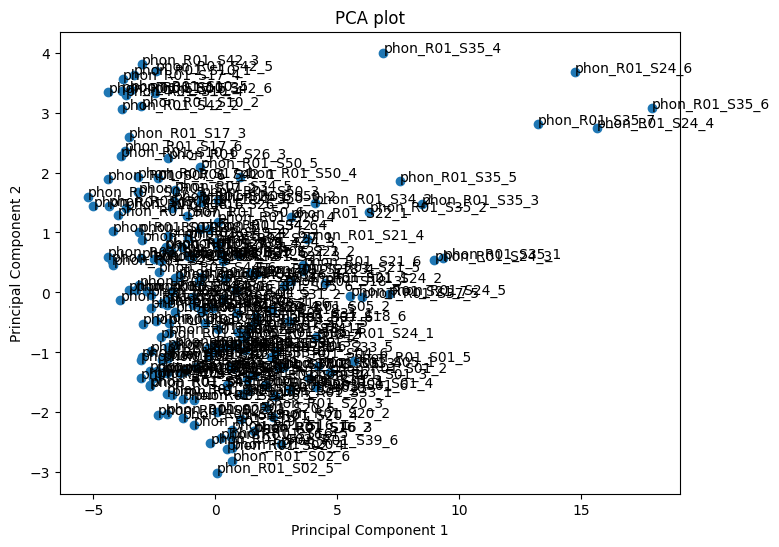

In [9]:
## total variance explained by first pca is 70.1%
## plotting pcas
## total variance explained by first pca is 68%
## plotting pcas

from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # import the library

pc_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2','PC3'])

# Concatenate the principal components with the 'name' column from the original DataFrame
pc_df = pd.concat([df['name'], pc_df], axis=1)

# Plot the first two principal components
plt.figure(figsize=(8, 6))
plt.scatter(pc_df['PC1'], pc_df['PC2'])

# Annotate the points with the 'name' column
for i, txt in enumerate(pc_df['name']):
    plt.annotate(txt, (pc_df['PC1'][i], pc_df['PC2'][i]))

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA plot')
plt.show()

In [65]:
df_new = df[~df['name'].isin(['phon_R01_S35_4', 'phon_R01_S24_4', 'phon_R01_S24_6', 'phon_R01_S35_6', 'phon_R01_S35_7'])]
#df_new=df_new.drop(['status','name'],axis=1)
#cols=df_new.columns
df_standardized_new = pd.DataFrame(scaler.fit_transform(df_new.drop(['status','name'],axis=1)), columns=df_new.drop(['status','name'],axis=1).columns)

df_standardized_new



,avg_fre,max_fre,min_fre,var_fre1,var_fre2,var_fre3,var_fre4,var_fre5,var_amp1,var_amp2,...,var_amp5,var_amp6,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,-0.816056,-0.427898,-0.941295,0.664350,1.118242,0.381218,1.282297,0.379495,0.992929,1.041415,...,0.530101,0.816726,0.083242,-0.285679,-0.789824,1.763792,0.905258,0.517575,-0.173698,1.003317
1,-0.757879,-0.531384,-0.043183,1.224870,1.498460,0.868886,2.037248,0.867274,2.106801,2.323157,...,1.567166,1.924749,-0.031558,-0.767917,-0.367943,1.840644,1.622878,1.360528,0.322714,2.012266
2,-0.896025,-0.741166,-0.095559,1.474667,1.878678,1.274420,2.489155,1.276324,1.536574,1.400303,...,0.989616,1.485494,-0.283956,-0.380245,-0.643517,1.945272,1.264975,1.062699,-0.064417,1.579482
3,-0.896170,-0.660310,-0.099931,1.313213,1.878678,1.058819,2.047881,1.057251,1.700491,1.624608,...,1.124724,1.679728,-0.266044,-0.381978,-0.594394,1.835455,1.581728,1.342926,0.105045,2.015881
4,-0.912164,-0.613543,-0.116379,2.187502,2.639114,1.844221,3.164357,1.846255,2.290970,2.053992,...,1.639174,2.338416,-0.097507,-0.628295,-0.764914,1.912543,1.941311,0.127630,-0.091402,2.512550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185,0.493316,0.453336,-0.495640,-0.325698,-0.402631,-0.168049,-0.286087,-0.166475,0.811292,0.906832,...,0.362330,0.996227,0.308364,-0.660973,-0.463984,-1.091583,-0.773011,-1.245345,0.779523,-0.817211
186,1.346839,0.716943,-0.606059,-0.005836,-0.402631,0.181018,-0.110640,0.182672,-0.034239,-0.003204,...,-0.280546,0.144856,-0.080002,-0.752568,-0.626294,-0.631761,-0.439157,-1.155680,1.119105,-0.386768
187,0.505396,0.561307,-0.957721,2.419020,1.498460,1.685087,1.335463,1.687085,-0.314606,-0.048065,...,-0.437925,-0.245937,3.545157,-1.065478,-0.859686,-1.131786,-1.014809,-0.800120,0.839217,-0.833086
188,1.087071,2.438647,-0.943447,0.530313,-0.022413,0.381218,0.410382,0.379495,-0.322200,-0.144196,...,-0.496570,-0.249814,2.123590,-0.784008,-0.437050,-1.344544,-0.973357,-0.202425,-0.609658,-0.934221


In [66]:
df_new

,name,avg_fre,max_fre,min_fre,var_fre1,var_fre2,var_fre3,var_fre4,var_fre5,var_amp1,...,var_amp6,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


Checking Imbalance in Dataset

In [11]:
np.mean(df['status'])


0.7538461538461538

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score

# Split the data into features (X) and target variable (y)
X = df_standardized_new
y = df_new['status']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the KNN classifier
knn = KNeighborsClassifier(n_neighbors=2)  # Example: 5 neighbors

# Train the classifier
knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test)

# Calculate the F1-score
er=np.mean(y_pred!=y_test)
f1 = f1_score(y_test, y_pred)


# Print the F1-score
print(f"F1-score: {f1}")
er


F1-score: 0.8918918918918919


0.14035087719298245

Oversampled the minority class and applied KNN for different K

In [70]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score

# Split the data into features (X) and target variable (y)
X = df_new.drop(['status','name'],axis=1)
y = df_new['status']

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Resample the data
X_resampled, y_resampled = smote.fit_resample(X,y)


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)



# Initialize variables to store the best k and accuracy_score
best_k = 1
lowest_err = 1
zero_vector = np.zeros(20)

# Iterate over k values from 1 to 20
for k in range(1, 21):
    # Initialize the KNN classifier
    knn = KNeighborsClassifier(n_neighbors=k)

    # Train the classifier
    knn.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = knn.predict(X_test)
    error=np.mean(y_test!=y_pred)
    zero_vector[k-1]=error



    # Calculate the accuracy_score
    accuracy = accuracy_score(y_test, y_pred)
    if error<lowest_err:
      lowest_err=error
      best_k=k

print("error=",lowest_err)
print("best_k=",best_k)

error= 0.11627906976744186
best_k= 1


Discrepancy in pattern of Errors, KNN is not a good classifier for the data


([<matplotlib.axis.XTick at 0x7d640ffc3010>,
 [Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(20, 0, '20')])

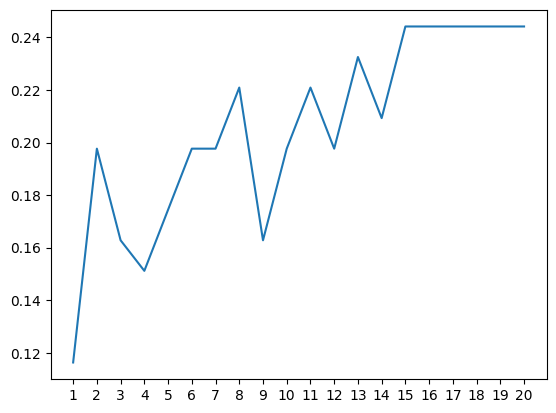

In [80]:

bhuj=np.arange(1,21)
plt.plot(bhuj,zero_vector)
plt.xticks(bhuj)

In [84]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.neighbors import KNeighborsClassifier

# Assuming X and y are already defined as features and target variable

# Initialize the KNN classifier
knn = KNeighborsClassifier(n_neighbors=1)  # Example: 5 neighbors

# Initialize KFold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)  # Example: 5 folds

# Perform cross-validation
scores = cross_val_score(knn, X, y, cv=kf, scoring='accuracy')

# Print the cross-validation scores
print(f"Cross-validation scores: {scores}")
print(f"Average accuracy: {scores.mean()}")

Cross-validation scores: [0.89473684 0.86842105 0.92105263 0.76315789 0.89473684]
Average accuracy: 0.868421052631579


In [85]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.neighbors import KNeighborsClassifier

# Assuming X and y are already defined as features and target variable

# Initialize the KNN classifier
knn = KNeighborsClassifier(n_neighbors=2)  # Example: 5 neighbors

# Initialize KFold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)  # Example: 5 folds

# Perform cross-validation
scores = cross_val_score(knn, X, y, cv=kf, scoring='accuracy')

# Print the cross-validation scores
print(f"Cross-validation scores: {scores}")
print(f"Average accuracy: {scores.mean()}")

Cross-validation scores: [0.78947368 0.84210526 0.89473684 0.73684211 0.81578947]
Average accuracy: 0.8157894736842104


The discrepancy is still after cross validation